In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

$$
x^2 + y^2 = 1
$$

[-1.01667024e-21 -2.36345798e-22  1.03026479e-18  2.17309888e-20
 -7.17718246e-16 -8.14960873e-19  3.81987350e-13  1.61137262e-17
 -1.50946332e-10 -1.81282896e-16  4.20586933e-08  1.16747990e-15
 -7.67058597e-06 -4.10736842e-15  8.16052493e-04  7.03799630e-15
 -4.13417022e-02 -4.52014382e-15  8.28318531e-01  5.83084337e-16]
2
4
7
20
31


/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


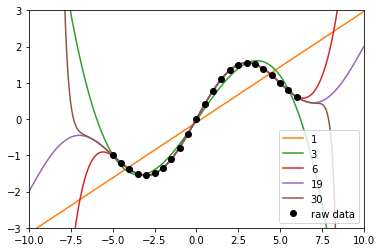

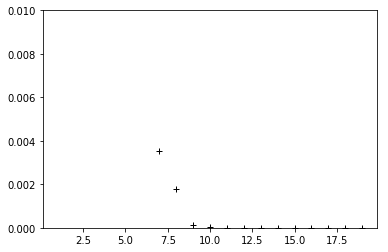

In [3]:
f = lambda y: np.sin(np.pi*y/5) + y/5
y = np.linspace(-5, 6, num=23)
b = f(y)
deg = [1, 3, 6, 19, 30]
p =[]
for d in deg:
    p.append(np.polyfit(y, b, d))
print(p[3])

fig = plt.figure()
axes = fig.gca()
# plot the true function
y1 = np.linspace(-5, 6, num=1000)
axes.set_xlim((-10, 10))
axes.set_ylim((-3, 3))
axes.set_aspect('auto')
axes.plot(y1, f(y1))

# plot the fit polynomial
y2 = np.linspace(-10, 10, num=1000)
for p0 in p:
    print(len(p0))
    b2 = np.polyval(p0, y2)
    axes.plot(y2, b2, label=str(len(p0)-1))
axes.plot(y, b,'ko',label='raw data')
axes.legend()


p = []
for d in range(1, 20):
    p.append(np.poly1d(np.polyfit(y, b, d)))

r = np.zeros((19,))
for i in range(0, 19):
    r[i] = np.linalg.norm(p[i](y) - b, 2)
fig1 = plt.figure()
axes1 = fig1.gca()
axes1.set_ylim((0, 0.01))
axes1.plot(range(1, 20), r, 'k+')

In [10]:
a = np.random.randn(9, 6)
print(a)

[[ 0.32751926 -0.89270021  2.36787733 -0.17221172  1.73755365  0.43255691]
 [ 0.93208573 -0.12676674  0.13060013 -1.39731869 -0.00474246  0.43904746]
 [-1.12647275  3.19561224  0.61099981  0.14219106 -1.23996088 -0.0219048 ]
 [ 1.22167995 -0.98747526  0.61028015 -0.45811623 -0.47041816  0.53462928]
 [-0.9990709  -1.92594059  1.19328015  0.50263479 -1.54621436 -0.44619937]
 [-1.09503316  0.27479698 -0.09566321  0.96224547  0.59330381  0.44670219]
 [ 0.2959723   0.84039444 -1.18530661 -0.47138365 -2.20047325  0.22621607]
 [-0.7471857  -0.62784105 -1.48117298  0.73076581 -0.82852781 -0.70097236]
 [ 0.12096463 -2.24321204 -0.04929151  0.69559731  1.37420505  0.51933844]]


(9, 6) (6,) (6, 6)


In [14]:
u, s, vh = np.linalg.svd(a, full_matrices=True)
print(u.shape, s.shape, vh.shape)

(9, 9) (6,) (6, 6)


In [ ]:
np.allclose(a, np.dot(u[:, :6] * s, vh))

In [18]:
u, s, vh = np.linalg.svd(a, full_matrices=False)
print(u.shape, s.shape, vh.shape)

(9, 6) (6,) (6, 6)


In [9]:
im = plt.imread("./test.jpg")
im.shape

(1920, 1080, 3)

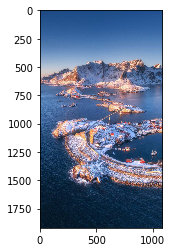

In [10]:
plt.imshow(im)

In [11]:
u0, s0, vh0 = np.linalg.svd(im[:, :, 0], full_matrices=False)
u1, s1, vh1 = np.linalg.svd(im[:, :, 1], full_matrices=False)
u2, s2, vh2 = np.linalg.svd(im[:, :, 2], full_matrices=False)
print(u0.shape, s0.shape, vh0.shape)

(1920, 1080) (1080,) (1080, 1080)


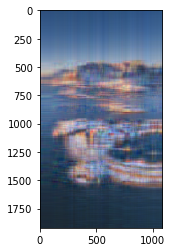

In [12]:
im10 = np.zeros(im.shape)
s = s0.copy()
s[10:] = 0
im10[:, :, 0] = np.dot(u0*s, vh0) # (u0*s)@vh0.T
s = s1.copy()
s[10:] = 0
im10[:, :, 1] = np.dot(u1*s, vh1)
s = s2.copy()
s[10:] = 0
im10[:, :, 2] = np.dot(u2*s, vh2)

imin = im10.min()
imax = im10.max()
im10 = (im10 - imin)/(imax - imin)

plt.imshow(im10)

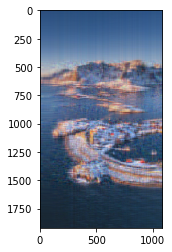

In [13]:
im20 = np.zeros(im.shape)
s = s0.copy()
s[20:] = 0
im20[:, :, 0] = np.dot(u0*s, vh0)
s = s1.copy()
s[20:] = 0
im20[:, :, 1] = np.dot(u1*s, vh1)
s = s2.copy()
s[20:] = 0
im20[:, :, 2] = np.dot(u2*s, vh2)

imin = im20.min()
imax = im20.max()
im20 = (im20 - imin)/(imax - imin)

plt.imshow(im20)

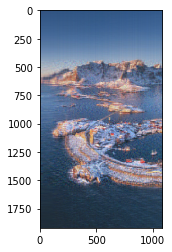

In [14]:
im40 = np.zeros(im.shape)
s = s0.copy()
s[40:] = 0
im40[:, :, 0] = np.dot(u0*s, vh0)
s = s1.copy()
s[40:] = 0
im40[:, :, 1] = np.dot(u1*s, vh1)
s = s2.copy()
s[40:] = 0
im40[:, :, 2] = np.dot(u2*s, vh2)

imin = im40.min()
imax = im40.max()
im40 = (im40 - imin)/(imax - imin)

plt.imshow(im40)

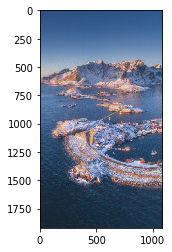

In [15]:
im100 = np.zeros(im.shape)
s = s0.copy()
s[100:] = 0
im100[:, :, 0] = np.dot(u0*s, vh0)
s = s1.copy()
s[100:] = 0
im100[:, :, 1] = np.dot(u1*s, vh1)
s = s2.copy()
s[100:] = 0
im100[:, :, 2] = np.dot(u2*s, vh2)

imin = im100.min()
imax = im100.max()
im100 = (im100 - imin)/(imax - imin)

plt.imshow(im100)